## Geometric Brownian Motion

The purpose of this notebook is to review and illustrate the definiton and main properties of the Geometric Brownian motion. 

In [10]:
# Imports
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import seaborn as sns 
sns.set(style="whitegrid")

%config InlineBackend.figure_format ='retina'
%config Completer.use_jedi = False

## Definition

Geometric Brownian motion is defined by the following Stochastic Differential Equation (SDE)
\begin{align}
dS_t &= \mu S_t dt + \sigma S_t W_t, \quad t >0,\\
\end{align}
where $S_0 =s_0>0$, and $W_t$ is a standard Brownian motion. In order to find its solution, let us set $X_t = \log(S_t)$. Using Ito's formula, we obtain

$$X_t = X_0 +  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t,$$

or equivalently 

$$\log(S_t) = \log(s_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t.$$

Note that the last expression implies that $\log(S_t)$ follows a normal distribution $\mathcal{N}\left(\log(s_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t, \sigma^2 t\right )$. This implies that 

$$S_t = s_0 \exp\left\{ \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t   \right\}, \quad \forall t>0,$$

follows a log-normal distribution.

Let's take a look at the density function of $S_1$ for different values of $\mu$ and $\sigma$. To do this we will write a function which returns a marginal distribution of the process, i.e. a random variable $S_t$.

In [12]:
def gb_rv(s0, mu, sigma, t):

    mu_x = np.log(s0) + (mu - 0.5*sigma**2)*t
    sigma_x = sigma*np.sqrt(t)
    gb_variable = lognorm(s=sigma_x, scale=np.exp(mu_x))

    return gb_variable

Now, we can plot $S_1$ for different values of $\mu$ and $\sigma$. 

First, we fix $\sigma$ and vary $\mu$.

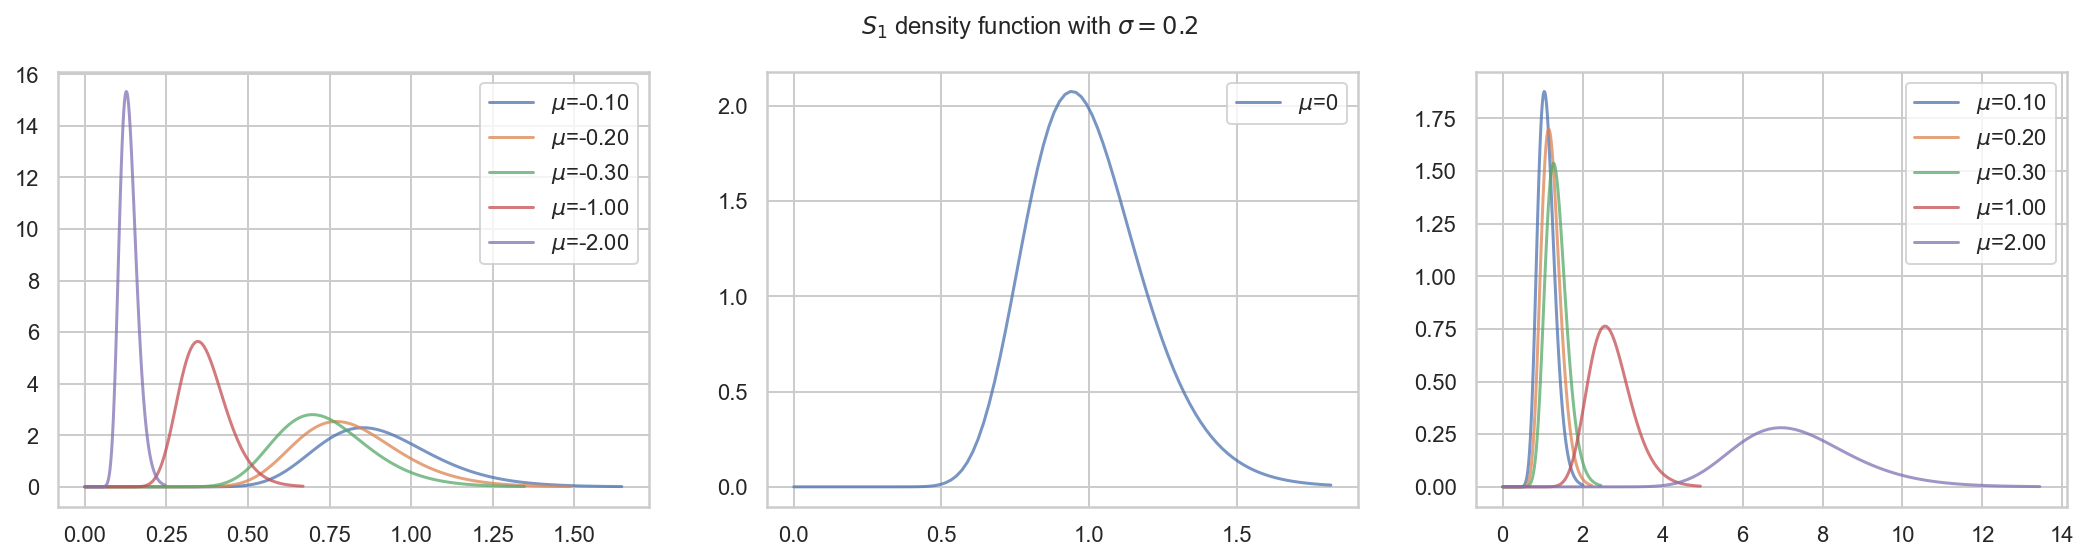

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
for mu in [-0.1, -0.2, -0.3, -1, -2]:
    St_variable = gb_rv(s0=1.0, mu=mu, sigma=0.2, t=1)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax1.plot(x, St_variable.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$\mu$={mu:.2f}')
ax1.legend()
for mu in [0]:
    St_variable = gb_rv(s0=1.0, mu=mu, sigma=0.2, t=1)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax2.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$\mu$={mu}')
ax2.legend()

for mu in [0.1, 0.2, 0.3, 1, 2]:
    St_variable = gb_rv(s0=1.0, mu=mu, sigma=0.2, t=1)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax3.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$\mu$={mu:.2f}')
ax3.legend()
fig.suptitle('$S_1$ density function with $\sigma=0.2$', size=12)
plt.show()

Next, we fix $\mu$ and vary $\sigma$.

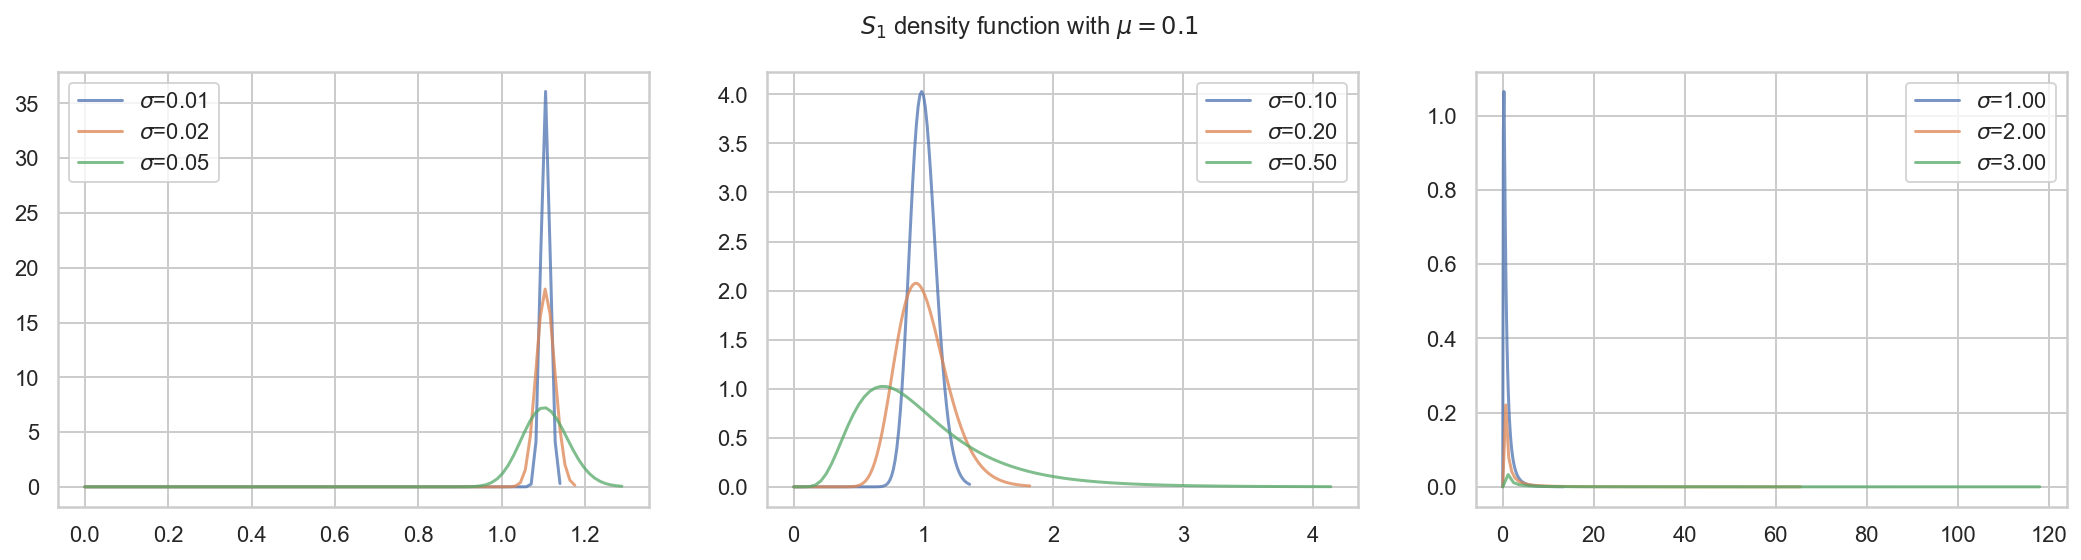

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
for sigma in [0.01, 0.02, 0.05]:
    St_variable = gb_rv(s0=1.0, mu=0.1, sigma=sigma, t=1)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax1.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$\sigma$={sigma:.2f}')
ax1.legend()
for sigma in [0.1,0.2,  0.5]:
    St_variable = gb_rv(s0=1.0, mu=0, sigma=sigma, t=1)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax2.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$\sigma$={sigma:.2f}')
ax2.legend()

for sigma in [1,2, 3]:
    St_variable = gb_rv(s0=1.0, mu=0, sigma=sigma, t=1)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax3.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$\sigma$={sigma:.2f}')
ax3.legend()
fig.suptitle('$S_1$ density function with $\mu=0.1$', size=12)

plt.show()

Finally, we fix both parameters $\mu, \sigma$ and vary $t$.

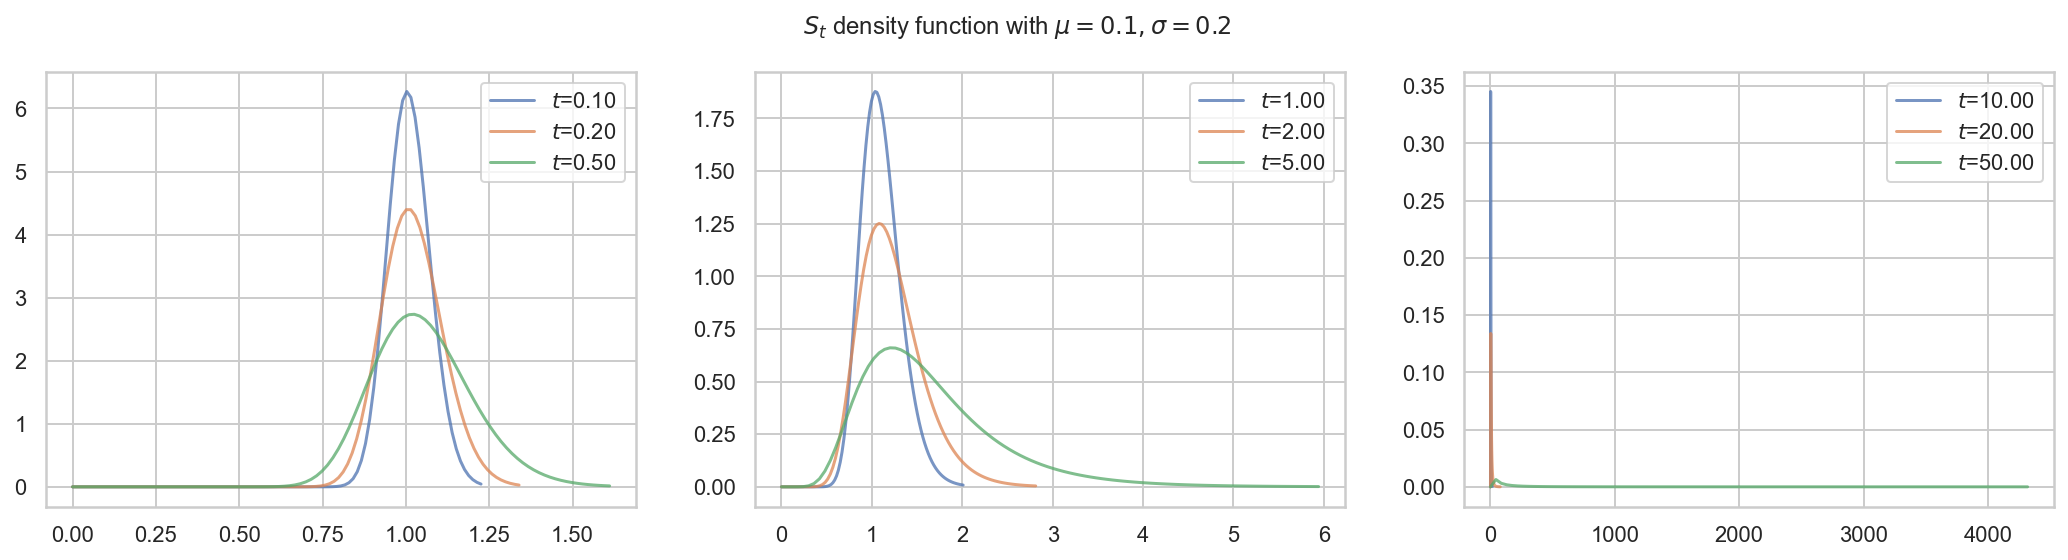

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
for ts in [0.1, 0.2, 0.5]:
    St_variable = gb_rv(s0=1.0, mu=0.1, sigma=0.2, t=ts)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax1.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={ts:.2f}')
ax1.legend()

for ts in [1, 2, 5]:
    St_variable = gb_rv(s0=1.0, mu=0.1, sigma=0.2, t=ts)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax2.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={ts:.2f}')
ax2.legend()

for ts in [10, 20, 50]:
    St_variable = gb_rv(s0=1.0, mu=0.1, sigma=0.2, t=ts)
    x = np.linspace(0, St_variable.ppf(0.999), 100)
    ax3.plot(x, St_variable.pdf(x), '-', lw=1.5,
             alpha=0.75, label=f'$t$={ts:.2f}')
ax3.legend()

fig.suptitle('$S_t$ density function with $\mu=0.1, \sigma=0.2$', size=12)

plt.show()


### Expectation and Variance

To calculate the expectation of $S_t$, we are going to use the fact that the process $M_t = \exp \{ \sigma W_t - \dfrac{1}{2}\sigma^2 t\}$ is an exponential martingale. Then
\begin{align*}
E\left[S_t \right] &= E\left[s_0\exp \left\{ (\mu  - \dfrac{1}{2}\sigma^2) t +   \sigma W_t \right\} \right]\\
&= s_0\exp \left\{ \mu t   \right\}  E\left[\exp \left\{  - \dfrac{1}{2}\sigma^2 t +  \sigma W_t \right\} \right]\\
&=s_0\exp \left\{ \mu t   \right\}.
\end{align*}

Similarly, for the variance we will use the fact that the process $M_t = \exp \left\{ 2\sigma W_t - 2\sigma^2 t \right\}$ is an exponential martingale. Then
\begin{align*}
E\left[S_t^2 \right]
&=E\left[s_0^2\exp \left\{  2\mu t- \sigma^2 t  +2\sigma W_t  \right\} \right] \\
&=s_0^2\exp \left\{2\mu t + \sigma^2 t  \right\}  E\left[s_0^2\exp \left\{ 2\sigma W_t - 2\sigma^2 t \right\} \right] \\
& =s_0^2 \exp \left\{(2\mu + \sigma^2 ) t \right\}.
\end{align*}
Hence
\begin{align*}
Var[ S_t] &= E\left[S_t^2 \right] - E\left[S_t \right]^2\\
& =s_0^2\exp \left\{(2\mu + \sigma^2 ) t \right\} - s_0^2\exp \left\{2\mu t \right\}\\
& = s_0^2\exp \left\{2\mu t \right\} \left(\exp \left\{\sigma^2 t \right\} - 1\right).
\end{align*}
So, for given $s_0, \mu, \sigma,$ and $t$, we can calculate both the expectation and the variance of $S_t$ using these formulas.

In [16]:
s0 = 1.0
mu = 0.1
sigma = 0.2
t= 10
print(f'For s_0={s0}' , f'mu={mu}', f'sigma=.{sigma}', f't={t}', sep=", ")
print(f'E[S_t]={(s0*np.exp(mu*t)):.2f}', f'Var[S_t]={(s0**2)*np.exp(2*mu*t)*(np.exp(t*sigma**2)-1) :.2f}', sep="\n")

For s_0=1.0, mu=0.1, sigma=.0.2, t=10
E[S_t]=2.72
Var[S_t]=3.63


We also can calculate the mean and the variance by using the .mean and .var functions on the appropriate log normal random variable.

In [17]:
mu_x = np.log(s0) + (mu - 0.5*sigma**2)*t
sigma_x = sigma*np.sqrt(t)
St_variable = lognorm(s=sigma_x, scale=np.exp(mu_x))
print(
      f'E[S_t]={St_variable.mean():.2f}',
      f'Var[S_t]={St_variable.var():.2f}', sep="\n")


E[S_t]=2.72
Var[S_t]=3.63


### Expectation and Variance Long Time Behaviour

Note that when $t$ goes to infinity, we have

\begin{equation*}
\lim_{t\rightarrow\infty} E\left[S_t \right] = \lim_{t\rightarrow\infty} s_0\exp \left\{ \mu t   \right\} = 
\begin{cases}
\infty, \hbox{  if  } \mu>0\\
s_0, \hbox{  if  }  \mu=0\\
0, \hbox{  if  }  \mu<0, \\
\end{cases}
\end{equation*}
and
\begin{equation*}
\lim_{t\rightarrow\infty}Var[ S_t] = \lim_{t\rightarrow\infty} s_0^2\exp \left\{2\mu t \right\} \left(\exp \left\{\sigma^2 t \right\} - 1\right) = 
\begin{cases}
\infty, \hbox{  if  } 2\mu+\sigma^2 >0\\
s_0^2, \hbox{  if  }  2\mu+\sigma^2=0.\\
0, \hbox{  if  }  2\mu+\sigma^2<0.\\
\end{cases}
\end{equation*}

In [18]:
def draw_gbm_mean_variance(s0, mu, sigma, T=100):

    fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(9, 4))
    ts = np.linspace(0, T, T)
    ax1.plot(ts, np.exp(mu*ts), lw=1.5, color='black', label='$E[S_t]$')
    ax1.set_xlabel('t')
    ax1.legend()
    ax2.plot(ts,  (s0**2)*np.exp(2*mu*ts) *
            (np.exp(ts*sigma**2)-1), lw=1.5, color='red', label='$Var[S_t]$')
    ax2.set_xlabel('t')
    ax2.legend()
    fig.suptitle('Expectation and Variance of $S_t$ with ' f'$s0$={s0:.2f}, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}', size=12)

    plt.show()

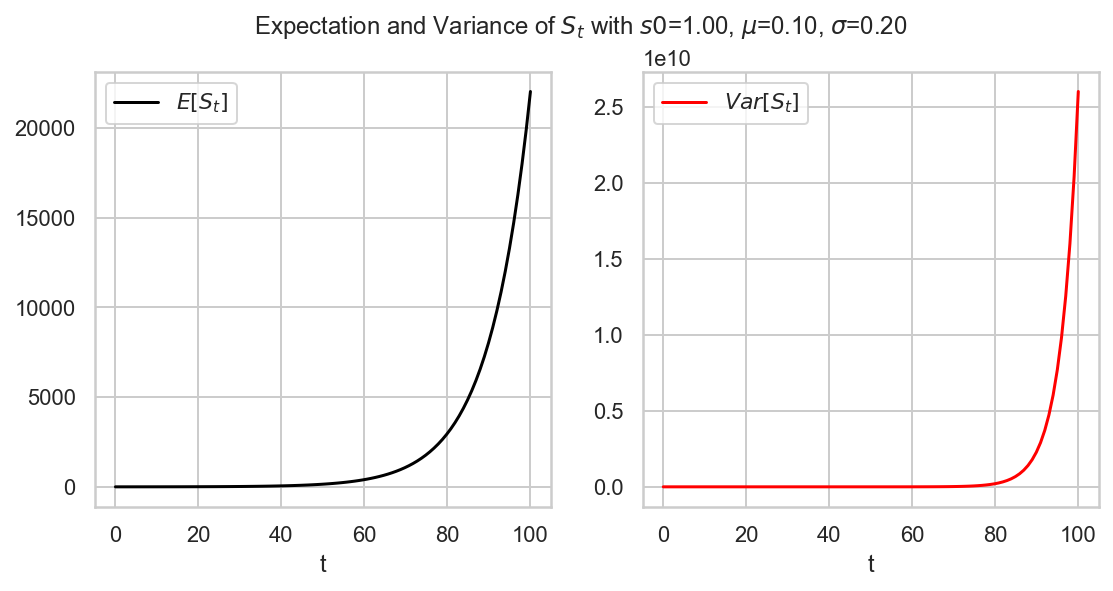

In [19]:
draw_gbm_mean_variance(s0=1.0, mu=0.1, sigma=0.2, T=100)

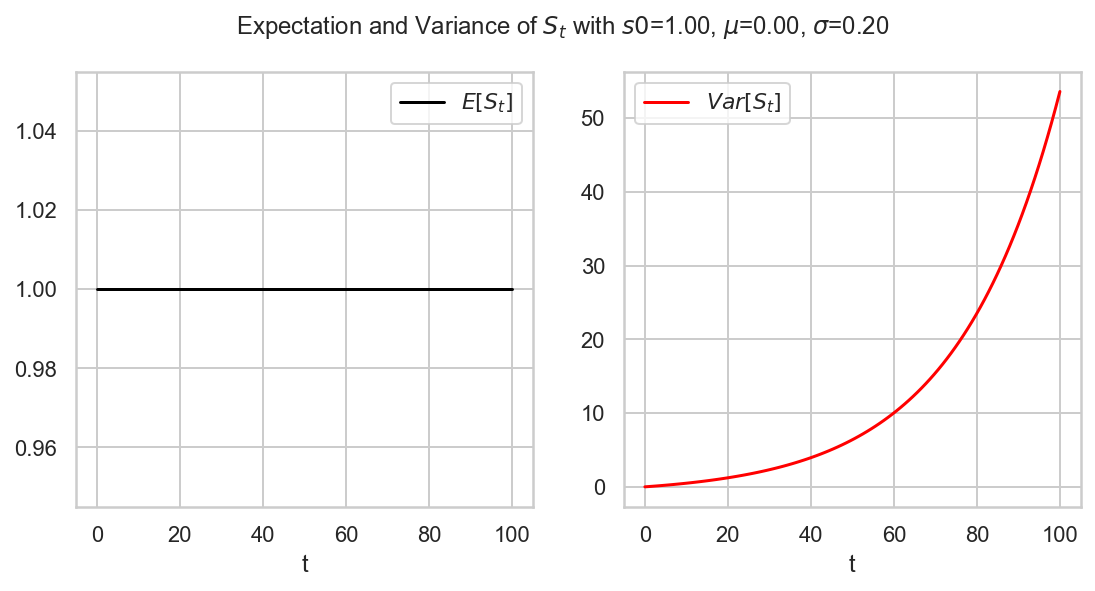

In [20]:
draw_gbm_mean_variance(s0=1.0, mu=0.0, sigma=0.2, T=100)

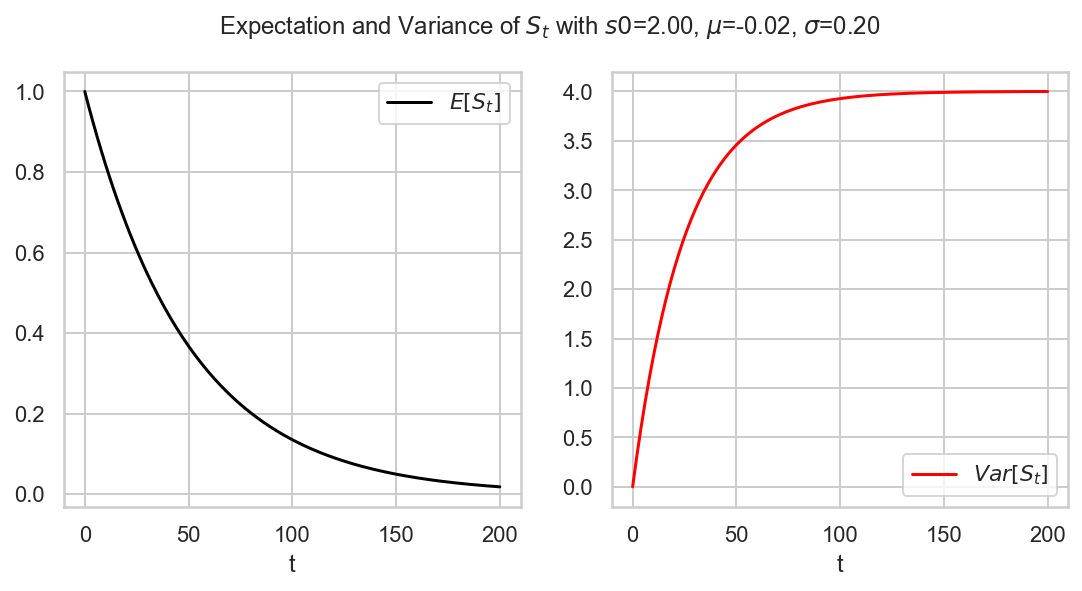

In [21]:
draw_gbm_mean_variance(s0=2.0, mu=-(0.2**2)/2, sigma=0.2, T=200)

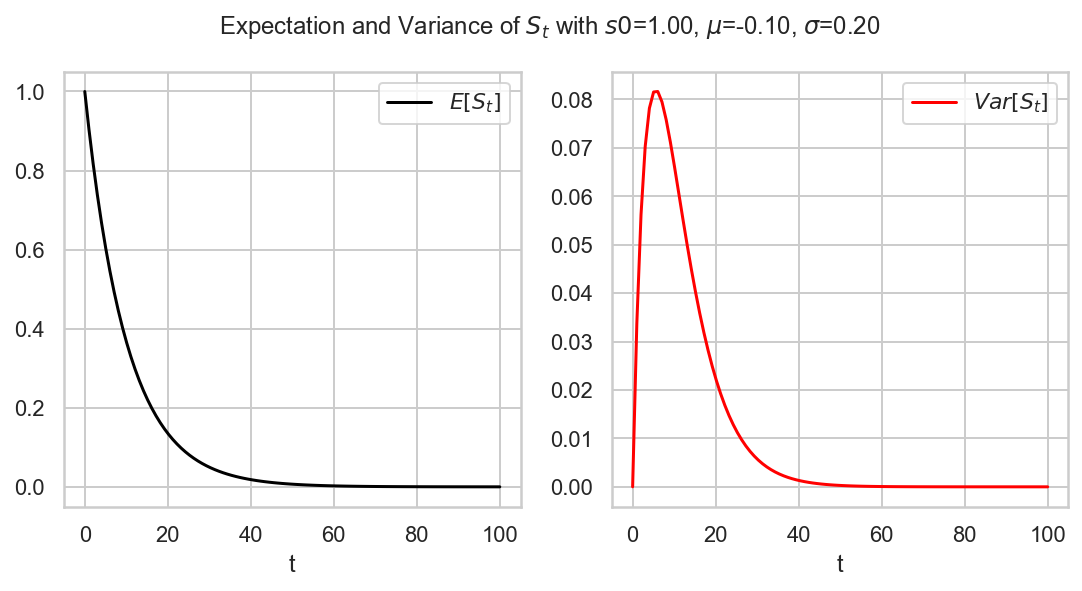

In [22]:
draw_gbm_mean_variance(s0=1.0, mu=-0.1, sigma=0.2, T=100)

### Simulation

In [23]:
def get_times(t0=0.0, T=1.0, steps=30):

    dt = (T-t0)/steps
    times = np.arange(t0, T+dt, dt)
    return times

def get_brownian_path(ts, bt0=0):

    n = len(ts)
    dt = (ts[n-1] - ts[0])/n
    increments = norm.rvs(loc=0, scale=np.sqrt(dt), size=n-1)
    increments = np.insert(increments, 0, bt0)
    bs = increments.cumsum()

    return bs

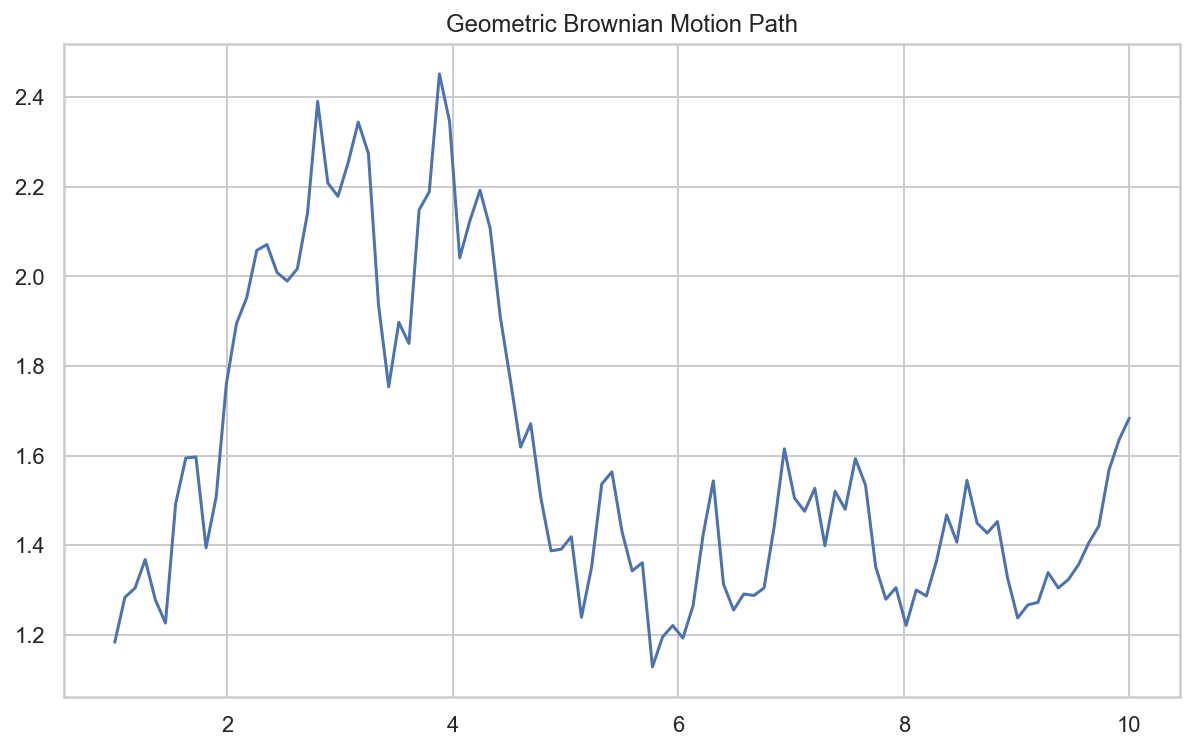

In [24]:
ts = get_times(t0=1, T=10, steps=100)
ws = get_brownian_path(ts)

s0 = 1
mu = 0.2
sigma = 0.25

gbs = s0*np.exp((mu-0.5*sigma**2)*ts + sigma*ws)
plt.figure(figsize=(10,6))
plt.plot(ts, gbs, '-', lw=1.5, label='GBM')
plt.title('Geometric Brownian Motion Path')
plt.show()

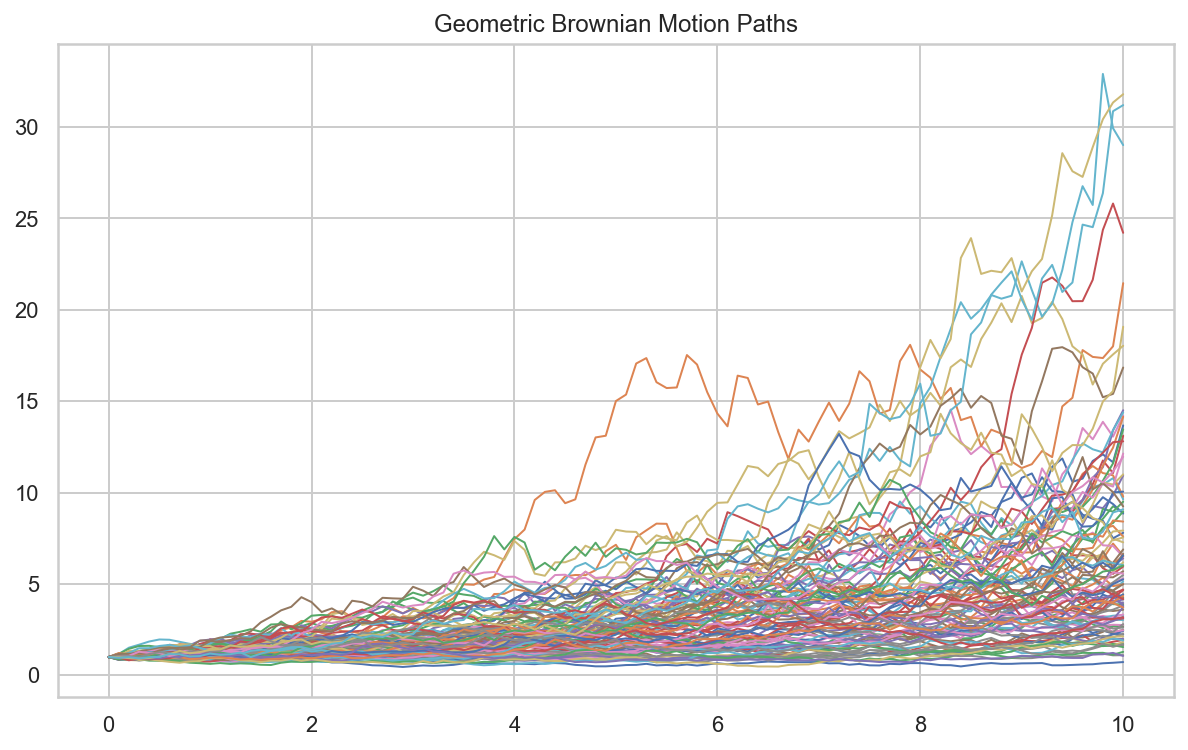

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ts = get_times(T=10, steps=100)


for m in range(100):
    ws = get_brownian_path(ts)
    gbs = s0*np.exp((mu-0.5*sigma**2)*ts + sigma*ws)
    ax.plot(ts, gbs, '-', lw=1)
plt.title('Geometric Brownian Motion Paths')
plt.show()

### Long Time Behaviour
- If $ \mu>\frac{1}{2}\sigma^2$, then $S_t\rightarrow\infty$ in probability as $t\rightarrow\infty$. 
- If $ \mu<\frac{1}{2}\sigma^2$, then $S_t\rightarrow 0$ in probability as $t\rightarrow\infty$. 
- If $ \mu = \frac{1}{2}\sigma^2$, then $S_t$ has no limit in probability as $t\rightarrow\infty$. 